# Cleaining the Photometry and save the SEDs data

In [1]:
import numpy as np
import time
import astropy.units as u
from astropy.table import Table, vstack, unique
from pathlib import Path
from matplotlib import pyplot as plt

import CleanPhotometry as CP #Code to clean the Photometry and ignore empty values in the tables

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

In [2]:
path_raw='../Datos/Raw/'
path_phot_ned = '../Datos/Work/Phot_Tables_NED/' #In this path wi will save the photometry tables for each object
path_phot_cds = '../Datos/Work/Phot_Tables_CDS/'
path_SED = '../Datos/Work/SEDs/'
Path(path_SED).mkdir(parents=True, exist_ok=True)

### Eliminating photometric duplicates between NED and CDS Tables:

The next function checks the rows of the CDS and NED photometric tables and remove the duplicate data in the photometric bands:

In [8]:
def check_both_tables(ned,cds):
    to_rem = [] #Rows to be deleted or removed
    for u_refcode in np.unique(ned['Refcode']): #For each bibcode
        l_cds = np.where(cds['Bibcode'] == u_refcode)[0]# Save the index in CDS table where is the bibcode selected
        l_ned = np.where(ned['Refcode'] == u_refcode)[0]# Save the index in NED table where is the bibcode selected
        if len(l_cds) > 0 and len(l_ned) > 0:
            print('Duplicate!')
            for lcds in l_cds: #For each index found
                for lned in l_ned:
                    flx_ned = str(ned[lned]['Flux_Density'])#Get the flux values in each tables
                    flx_cds = str(cds[lcds]['sed_flux'])
                    if flx_ned == flx_cds: #If the fluxes values are equel then...
                        print('Deleting NED filter ',ned[lned]['Observed_Passband'],
                              ' with Bibcode ',ned[lned]['Refcode'])                         
                        to_rem.append(lned) #Save the index to be removed in NED table because is duplicated in CDS
    print(to_rem)
    ned.remove_rows(to_rem)
    
    return ned

In [3]:
date_sample = 'Sep_02_2022'
date_sample_2 = 'May_29_2023'
NeIR_Sy_t = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
NeIR_QSO_t = Table.read(path_raw+'Obj_QSO_Ne-IR_'+date_sample_2+'.vot',format='votable')
NeIR_Sy_t.show_in_notebook()

idx,Main_Id,Id_used_NED,RA,DEC,otype_txt,redshift,rvz_type,ids,otypes,cds_url,SMB_sample_index,NED_Ne_IR_info
0,3C 234.0,3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,z,Gaia DR3 743659018773360128|WISEA J100149.52+284708.9|2MASX J10014950+2847089|GRA B0959+28|GRA J1001+28|1Jy 0958+290|1Jy 0958+29|3C 234.0|3C 234|3CR 234|4C 29.35|7C 0958+2901|B2 0958+29|B2.2 0958+29|BWE 0958+2901|CSO 31|CTA 49|CTD 64|Cul 0958+290|Cul 0958+29|DA 280|DB 72|GB6 B0958+2901|INTREF 402|IRAS 09589+2901|IRAS F09589+2901|LEDA 139234|LHE 265|MITG J100147+2846|NRAO 343|OHIO L 200|QSO B0958+290|S2 0958+29|TXS 0958+290|UT 0958+290|VRO 29.09.03|WB 0958+2901|[ATI98] 095851+2910|[BDW2002] q0958+2901|[HB91] 0958+290|[W72] 0958+29|[WTW94] 0958+290|[GW2008] CoNFIG 64|87GB 095856.9+290154|[VV2000c] J100149.5+284710|[VV2003c] J100149.5+284710|[VV2006c] J100149.5+284710|[VV98c] J100149.5+284710|SDSS J100149.52+284708.9|[VV2010c] J100149.5+284710|WISE J100149.52+284709.0|AKARI-IRC-V1 J1001495+284708|EQ J1001+287|PBC J1001.8+2847|NVSS J100146+284656|7C 095855.89+290131.00|[CAB95] IRAS F09589+2901|VLSS J1001.8+2847|SWIFT J1001.8+2848|Gaia DR2 743659018773360128,*|AGN|G|IR|QSO|Rad|Sy1|X|blu|gam,http://vizier.u-strasbg.fr/viz-bin/sed?-c=150.45634473807%2028.7858176354&-c.rs=5,283.0,NeII|NeIII|NeV
1,2MASS J13000535+1632148,NVSS J130005+163212,195.02228295163,16.53743305218,Sy1,0.07993,z,Gaia DR3 3937375195178654720|TIC 88137340|2MASS J13000535+1632148|NVSS J130005+163212|2MASX J13000533+1632151|2MASSI J1300053+163214|2MASS J13000534+1632149|FIRST J130005.3+163214|[VV2003c] J130005.3+163214|[VV2006c] J130005.3+163214|[VV2010c] J130005.3+163214|PBC J1300.1+1636|SDSS J130005.34+163214.8|SDSS J130005.35+163214.8|LEDA 3800210|SWIFT J1300.1+1635|AKARI-IRC-V1 J1300053+163214|Gaia DR2 3937375195178654720,*|AGN|G|IR|Rad|Sy1|X,http://vizier.u-strasbg.fr/viz-bin/sed?-c=195.02228295163%2016.53743305218&-c.rs=5,428.0,NeII|NeIII
2,NGC 262,NGC 262,12.196426138730002,31.956956641230004,Sy2,0.015260233939595302,v,Gaia DR3 360927649734789248|LAMOST J004847.14+315725.1|IERS B0046+316|[KRL2007b] 7|2E 189|1AXG J004847+3157|2E 0046.0+3140|B2.1 0046+31|BWE 0046+3141|GB6 B0046+3140|INTREF 37|IRAS 00461+3141|IRAS F00460+3141|JVAS J0048+3157|JVAS B0046+316|LEDA 2855|MAPS-PP O-601-810121|MCG+05-03-008|MITG J004846+3156|Mrk 348|NGC 262|NPM1G +31.0015|NVSS J004847+315725|Gaia DR1 360927645439037056|UVQS J004847.14+315725.0|TXS 0046+316|UGC 499|WB 0046+3141|WN B0046.0+3141|XSS J00485+3203|Z 501-20|[BTW2003] J0048+3159|[DML87] 16|[HB91] 0046+316|2MASX J00484711+3157249|2XMM J004847.1+315724|1RXP J004847.4+315716|87GB 004606.1+314104|ICRF J004847.1+315725|MY 004604.0+314145.8|SWIFT J0048.8+3155|SWIFT J0048.8+3157|Z 0046.1+3142|[CHM2007] HDC 36 J004847.11+3157249|[CHM2007] LDC 43 J004847.11+3157249|[M98c] 004604.4+314100|[VV2000c] J004847.2+315725|[VV2003c] J004847.2+315725|[VV2006c] J004847.2+315725|[VV98c] J004847.2+315725|UZC J004847.2+315725|CGRaBS J0048+3157|PSCz Q00461+3141|[MGL2009] BZU J0048+3157|PBC J0048.7+3157|SWIFT J0048.7+3157|MAXI J0048+320|[VV2010c] J004847.2+315725|QSO J0048+3157|QSO B0046+316|[MML2015] 5BZG J0048+3157|[CAB95] IRAS F00460+3141|CLASS J004847.1435+315725.092|2MAXI J0048+320|Gaia DR2 360927649734789248,*|AGN|Bla|G|GiG|IR|QSO|Rad|Sy2|X|gam,http://vizier.u-strasbg.fr/viz-bin/sed?-c=12.196426138730002%2031.956956641230004&-c.rs=5,484.0,NeII|NeIII|NeV
3,IRAS 04385-0828,IRAS 04385-0828,70.2290037068,-8.37281297812,Sy2,0.015064,z,Gaia DR3 3186063094441390720|6dFGS gJ044055.0-082222|IRAS F04385-0828|IRAS 04385-0828|LEDA 15806|NPM1G -08.0177|[DML87] 141|[HB91] 0438-084|[VFT93] 0438-0828|[VV2000c] J044055.0-082222|[VV2003c] J044055.0-082222|[VV2006c] J044055.0-082222|2MASX J04405494-0822221|[CHM2007] HDC 310 J044054.94-0822221|[CHM2007] LDC 330 J044054.94-0822221|[VV98c] J044053.3-082228|PSCz Q04385-0828|IRAS 0438-084P11|[VV2010c] J044055.0-082222|Gaia DR2 3186063094440691200,*|AGN|G|GiG|IR|Sy2,http://vizier.u-strasbg.fr/viz-bin/sed?-c=70.2290037068%20-8.37281297812&-c.rs=5,541.

### Cleaining the Photometry, ignore empty values and saving the SEDs data

### Seyfert:

In [10]:
start_cds = time.time()
for i, id_ in enumerate(NeIR_Sy_t['Main_Id']):
    print(i,' ',id_,':')
    cds_table = Table.read(path_phot_cds+NeIR_Sy_t['Main_Id'][i]+'_CDS_phot_tables'+'.vot',
                           format='votable')
    NED_table = Table.read(path_phot_ned+NeIR_Sy_t['Main_Id'][i]+'_NED_phot_tables'+'.vot',
                           format='votable')          
    ned_table = check_both_tables(NED_table,cds_table)
    cleaned = CP.CleanPhotometry(cds_table, ned_table)
    SED = cleaned.final_tab
    BIBCODES = ';'.join(cleaned.bib_codes)
    with open("../Datos/Work/Bibcodes_SED.csv", "a+") as file_bibcodes:
        file_bibcodes.writelines([id_+',', BIBCODES+'\n'])
        file_bibcodes.close()
    SED.write(path_SED+id_+'_Phot.txt', format='ascii',overwrite=True)
    print(id_, 'Finish\n')
end_cds = time.time()

print('\nExecution Time(seg): ' + str(end_cds - start_cds))
print('Execution Time(min): ' + str((end_cds - start_cds)/60))
print('Execution Time(hrs): ' + str((end_cds - start_cds)/3600))

0   3C 234.0 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
[177, 163, 155, 136, 124, 173, 134, 217]
Cleaning
3C 234.0 Finish

1   2MASS J13000535+1632148 :
[]
Cleaning
2MASS J13000535+1632148 Finish

2   NGC   262 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  8.4 GHz (VLA)  with Bibcode  2007ApJS..171...61H
Duplicate!
Du

NGC  3735 Finish

15   NGC  4477 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2011ApJ...731L..41B
Duplicate!
Duplicate!
Deleting NED filter  22 microns (WISE)  with Bibcode  2014A&A...565A.128C
Deleting NED filter  12 microns (WISE)  with Bibcode  2014A&A...565A.128C
Duplicate!
Deleting NED filter  22 microns (WISE)  with Bibcode  2014A&A...570A..69B
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
Duplicate!
Deleting NED filter  140 mcicrons (AKARI)  with Bibcode  2017A&A...605A..74K
Deleting NED filter  18 microns (AKARI)  with Bibcode  2017A&A...605A..74K
Deleting NED filter  9 microns (AKARI)  with Bibcode  2017A&A...605A..74K
[143, 176, 138, 130, 137, 43, 32, 160, 135, 124]
Cleaning
NGC  4477 Finish

1

Cleaning
NAME Circinus Galaxy Finish

33   IC 3639 :
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
[182, 150, 135, 125, 102, 87]
Cleaning
IC 3639 Finish

34   Mrk  926 :
Duplicate!
Duplicate!
Deleting NED filter  V (Johnson)  with Bibcode  2009AJ....138..845O
Deleting NED filter  B (Johnson)  with Bibcode  2009AJ....138..845O
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  350 microns (SPIRE)  with Bibco

NAME Cyg A Finish

47   Mrk  877 :
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  6 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
[69, 65, 58, 57, 42]
Cleaning
Mrk  877 Finish

48   ESO 148-2 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  863 MHz (ASKAP)  with Bibcode  2016MNRAS.457.4160H
[61, 145]
Cleaning
ESO 148-2 Finish

49   Mrk 1383 :
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleti

LEDA   37102 Finish

59   ESO 323-77 :
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[108, 89, 66, 103, 96, 106, 105, 104]
Cleaning
ESO 323-77 Finish

60   FRL   49 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  160 

2MASX J14305363+3458364 Finish

70   M  81 :
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2007ApJ...669..959R
Duplicate!
Deleting NED filter  8.4 GHz (VLA)  with Bibcode  2007ApJS..171...61H
Duplicate!
Duplicate!
Deleting NED filter  160 microns (MIPS)  with Bibcode  2009ApJ...703..517D
Deleting NED filter  70 microns (MIPS)  with Bibcode  2009ApJ...703..517D
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...703..517D
Deleting NED filter  8.0 microns (IRAC)  with Bibcode  2009ApJ...703..517D
Deleting NED filter  5.8 microns (IRAC)  with Bibcode  2009ApJ...703..517D
Deleting NED filter  4.5 microns (IRAC)  with Bibcode  2009ApJ...703..517D
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
[205, 271, 244, 229, 201, 159, 151, 139, 133, 45, 32]
Cle

IRAS 15091-2107 Finish

86   UGC 12282 :
Duplicate!
Duplicate!
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[44, 49, 48, 47]
Cleaning
UGC 12282 Finish

87   2MASS J14294306+4747262 :
Duplicate!
[]
Cleaning
2MASS J14294306+4747262 Finish

88   MCG+10-17-021 :
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  150 MHz (LOFAR)  with Bibcode  2017A&A...598A.104S
Duplicate!
Deleting NED filter  1.4 GHz (NVSS/FIRST)  with Bibcode  2018AJ....155..188L
[85, 71, 93, 91]
Cleaning
MCG+10-17-021 Finish

89   ESO 113-45 :
Duplicate!
Duplicate!
Deleting NED filter  V (Johnson)  with Bibcode  20

NGC   788 Finish

99   2C 1066 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
Duplicate!
Deleting NED filter  1.4 GHz  with Bibcode  2014MNRAS.445..955B
Duplicate!
Deleting NED filter  150 MHz (LOFAR)  with Bibcode  2017A&A...598A.104S
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2017MNRAS.471...28K
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2017MNRAS.471...28K
Deleting NED filter  160 microns (PACS)  with Bibcode  2017MNRAS.471...28K
Deleting NED filter  70 microns (PACS)  with Bibcode  2017MNRAS.471...28K
[108, 106, 94, 118, 71, 70, 66, 60]
Cleaning
2C 1066 Finish

100   IC 5298 :
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  24 microns MIPS AB  with Bibcode 

NGC  4138 Finish

108   NGC  1566 :
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2007ApJ...669..959R
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  843 MHz (SUMSS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
[258, 310, 309, 173]
Cleaning
NGC  1566 Finish

109   NGC  1808 :
Duplicate!
Deleting NED filter  1.49 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  843 MHz (SUMSS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (NVSS)  with Bibcode  2014MNRAS.440..696A
Duplicate!
Deleting NED filte

NGC  5273 Finish

121   Mrk  609 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  1.4 GHz (NVSS/FIRST)  with Bibcode  2018AJ....155..188L
[134, 124, 115, 97, 86, 128, 93, 146]
Cleaning
Mrk  609 Finish

122   NGC  3079 :
Duplicate!
Deleting NED filter  151 MHz (6C)  with Bibcode  1990MNRAS.246..256H
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D

NGC   424 Finish

132   Mrk  509 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  Qa (GeminiS)  with Bibcode  2014MNRAS.439.1648A
Deleting NED filter  NEII (VLT)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Deleting NED filter  70 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  70 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  160 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  160 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  w

NGC  7314 Finish

143   ESO 420-13 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
[33, 95, 71, 46]
Cleaning
ESO 420-13 Finish

144   UGC  1395 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
[59, 50, 46, 36, 33]
Cleaning
UGC  1395 Finish

145   IC 4518A :
[]
Cleaning
IC 4518A Finish

146   NAME Centaurus A :
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with 

NGC  4748 Finish

159   NGC  1667 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
[140, 124, 114, 87, 70]
Cleaning
NGC  1667 Finish

160   2C 1883 :
Duplicate!
Deleting NED filter  750 MHz (NRAO)  with Bibcode  1966ApJS...13...65P
Deleting NED filter  1400 MHz (NRAO)  with Bibcode  1966ApJS...13...65P
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  2.3 GHz (VLBI)  with Bibcode  2010A&A...520A.113B
Deleting NED filter  8.4 GHz (VLBI)  with Bibcode  2010A&A...520A.113B
Duplicate!
Deleting NED filter  2.2 GHz (VLBA)  with Bibcode  2013AJ....146....5P
Deleting NED filter  8.4

Mrk  335 Finish

174   NGC  3976 :
Duplicate!
Duplicate!
Deleting NED filter  z (SDSS) AB  with Bibcode  2014ApJS..215...22K
Deleting NED filter  i (SDSS) AB  with Bibcode  2014ApJS..215...22K
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
[18, 12, 49, 50, 51, 3, 2]
Cleaning
NGC  3976 Finish

175   M  58 :
Duplicate!
Deleting NED filter  4.85 GHz Effelsberg  with Bibcode  2004A&A...418....1V
Deleting NED filter  8.6 GHz Effelsberg  with Bibcode  2004A&A...418....1V
Deleting NED filter  10.55 GHz Effelsberg  with Bibcode  2004A&A...418....1V
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2007ApJ...669..959R
Duplicate!
D

3C  84 Finish

184   LEDA 2149945 :
Duplicate!
Duplicate!
[]
Cleaning
LEDA 2149945 Finish

185   NGC  7743 :
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2011ApJ...731L..41B
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
[147, 98, 29, 26]
Cleaning
NGC  7743 Finish

186   Mrk   22 :
Duplicate!
[]
Cleaning
Mrk   22 Finish

187   LEDA   90127 :
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2009AJ....137...42R
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED fi

ICRF J134733.3+121724 Finish

196   NGC  3367 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
[121, 119, 155, 134]
Cleaning
NGC  3367 Finish

197   ESO 362-18 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting N

ESO 602-25 Finish

206   MCG-03-34-064 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (NVSS)  

Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  1.425 GHz (VLA)  with Bibcode  1996ApJS..103...81C
Duplicate!
Duplicate!
Deleting NED filter  4.8 GHz (VLA)  with Bibcode  2010ApJ...720..555P
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Duplicate!
[213, 209, 205, 172]
Cleaning
Mrk 1066 Finish

218   ESO 253-3 :
Duplicate!
Duplicate!
[]
Cleaning
ESO 253-3 Finish

219   2MASS J01083516+2148186 :
[]
Cleaning
2MASS J01083516+2148186 Finish

220   3C  22.0 :
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
[98]
Cleaning
3C  22.0 Finish

221   2MASX J14304627+3513133 :
Duplicate!
Deleting NED filter  1.38 GHz (WSRT)  with Bibcode  2002AJ....123.1784D
Duplicate!
Deleting NED filter  15 microns Spitzer  with Bibcode  2009ApJ...693..370W
Deleting NED filter  5.5 microns Spitzer  with Bibcode  2009ApJ...693..370W
Duplicate!
Deleting NED filter  70 micr

NGC  1058 Finish

229   IC 2560 :
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
[85]
Cleaning
IC 2560 Finish

230   QSO B1048+342 :
Duplicate!
[]
Cleaning
QSO B1048+342 Finish

231   NGC  1125 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibc

Mrk    3 Finish

244   NGC  4051 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  Si-5 (GeminiN)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
Deleting NED filter  325 MHz (WENSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  1400 MHz (NVSS)  wi

NGC  4725 Finish

256   NGC  7682 :
Duplicate!
[]
Cleaning
NGC  7682 Finish

257   [VV2003c] J124819.8+662143 :
[]
Cleaning
[VV2003c] J124819.8+662143 Finish

258   7C 1821+6419 :
[]
Cleaning
7C 1821+6419 Finish

259   MCG-01-24-012 :
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[77, 61, 87, 82, 90, 89, 88]
Cleaning
MCG-01-24-012 Finish

260   NGC  1358 :
[]
Cleaning
NGC  1358 Finish

261   NGC  2110 :
Duplicate!
Deleting NED filter  365 MHz (Te

ICRF J182931.7+484446 Finish

272   NGC  5033 :
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2007ApJ...669..959R
Duplicate!
Duplicate!
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  24 microns MIPS AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  24 microns MIPS AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  8.0 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  5.8 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  4.5 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  3.4 microns WISE AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  J (2MASS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  z (SDSS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  r (SDSS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  g (SDSS) AB  with Bibcode  2014ApJS..212...18B
Duplicate!
Duplicate!
Deleting NE

Z 121-75 Finish

286   Mrk  841 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  6 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[182, 176, 165, 159, 133, 195, 190, 196]
Cleaning
Mrk  841 Finish

287   NGC  3147 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  4 MHz (VLSSr)  with Bibcode  2015AJ....149...32M
Deleting NED filter  325 MHz (WENSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  1400 MHz (NVSS)  with

NGC  4253 Finish

296   Mrk  478 :
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  6 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  70 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  70 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  160 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Deleting NED filter  160 microns (MIPS)  with Bibcode  2015ApJS..217...17H
Duplicate!

### QSO:

In [11]:
start_cds = time.time()
for i, id_ in enumerate(NeIR_QSO_t['Main_Id']):
    print(i,' ',id_,':')
    cds_table = Table.read(path_phot_cds+NeIR_QSO_t['Main_Id'][i]+'_CDS_phot_tables'+'.vot',
                           format='votable')
    NED_table = Table.read(path_phot_ned+NeIR_QSO_t['Main_Id'][i]+'_NED_phot_tables'+'.vot',
                           format='votable')          
    ned_table = check_both_tables(NED_table,cds_table)
    cleaned = CP.CleanPhotometry(cds_table, ned_table)
    SED = cleaned.final_tab
    BIBCODES = ';'.join(cleaned.bib_codes)
    with open("../Datos/Work/Bibcodes_SED.csv", "a+") as file_bibcodes:
        file_bibcodes.writelines([id_+',', BIBCODES+'\n'])
        file_bibcodes.close()
    SED.write(path_SED+id_+'_Phot.txt', format='ascii',overwrite=True)
    print(id_, 'Finish\n')
end_cds = time.time()

print('\nExecution Time(seg): ' + str(end_cds - start_cds))
print('Execution Time(min): ' + str((end_cds - start_cds)/60))
print('Execution Time(hrs): ' + str((end_cds - start_cds)/3600))

0   QSO B1549-790 :
Duplicate!
Duplicate!
Deleting NED filter  18.5 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Deleting NED filter  22 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Duplicate!
Deleting NED filter  5 GHz (ATCA)  with Bibcode  2006AJ....131..114B
Duplicate!
Deleting NED filter  8.4 GHz  with Bibcode  2007ApJS..171...61H
Duplicate!
Deleting NED filter  5 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  8 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  20 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Duplicate!
[95, 92, 108, 101, 111, 103, 94]
Cleaning
QSO B1549-790 Finish

1   3C  48 :
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  1970A&AS....1..281C
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting N

### Plotting the SEDs from NED and CDS

The next funcion plots the SED directly from the data obteined in the photmetry tables downloades from NED and CDS and previosly saved in the hard disk.

In [12]:
def plotSED(idx_obj,NeIR_obj_t):
    print(NeIR_obj_t['Main_Id'][idx_obj])
    cds_t = Table.read(path_phot_cds+NeIR_obj_t['Main_Id'][idx_obj]+'_CDS_phot_tables'+'.vot',format='votable')                 
    ned_t = Table.read(path_phot_ned+NeIR_obj_t['Main_Id'][idx_obj]+'_NED_phot_tables'+'.vot',format='votable')
    plt.figure(figsize=(7,3))
    plt.scatter(cds_t['sed_freq'].to(u.micron, equivalencies=u.spectral()),  
                cds_t['sed_flux']*1000,s=70,label='CDS')
    plt.scatter(ned_t['Frequency'].to(u.micron, equivalencies=u.spectral()),
                ned_t['Flux_Density']*1000, marker='*',s=70,label='NED')
    plt.loglog()
    plt.xlabel(r'Wavelength [$\mu$m]',fontsize=14)
    plt.ylabel('Flux [mJy]',fontsize=14)
    plt.grid(color='k', linestyle='--', linewidth=0.05)
    plt.legend()                    

LEDA 3096524


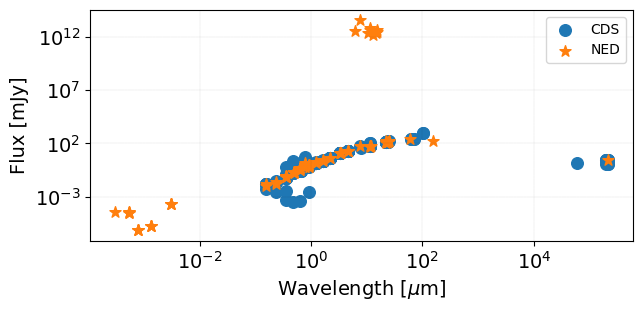

In [37]:
plotSED(92,NeIR_Sy_t)

### Plotting some obteined SED  

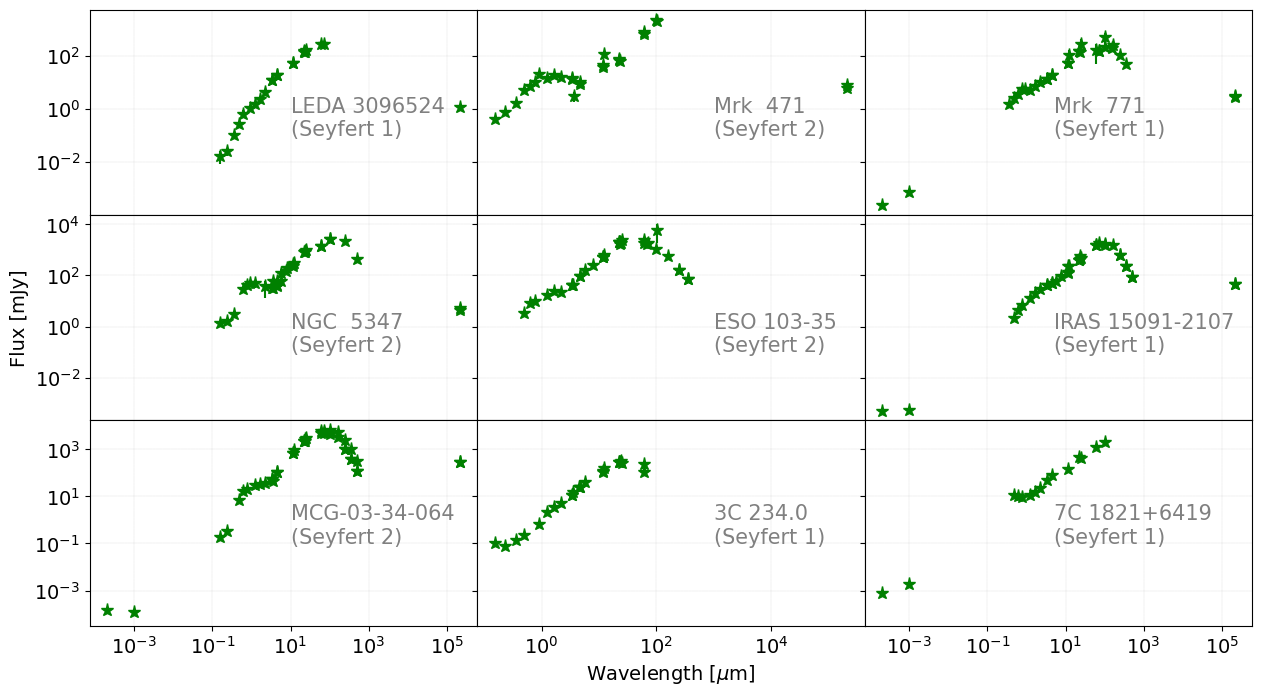

In [57]:
seyferts = ['LEDA 3096524','Mrk  471','Mrk  771',
            'NGC  5347','ESO 103-35','IRAS 15091-2107',
            'MCG-03-34-064','3C 234.0','7C 1821+6419']
types = ['(Seyfert 1)','(Seyfert 2)','(Seyfert 1)',
         '(Seyfert 2)','(Seyfert 2)','(Seyfert 1)',
         '(Seyfert 2)','(Seyfert 1)','(Seyfert 1)']

fig, axs = plt.subplots(3,3,figsize=(15,8),sharex='col',sharey='row')

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
line_width = 0.8

i=0
j=0

for sed, gal in enumerate(seyferts):
    seds = Table.read(path_SED+gal+'_Phot.txt', format='ascii')
    axs[i,j].errorbar(seds['Wave'],seds['Flux']*1000,
                      yerr=seds['F_er']*1000,fmt='*g',markersize=9.5)
    axs[i,j].loglog()
    axs[i,j].grid(color='k', linestyle='--', linewidth=0.05)
    if i==0:
        y=1e-1
    elif i==1 or i==2:
        y=1e-1
    if j==0:
        x=10
    elif j==1:
        x=10e2
    elif j==2:
        x=5
    axs[i,j].text(x,y,gal+'\n'+types[sed],fontsize=15,color='gray')
    j+=1
    if j>2:
        i+=1
        j=0

axs[1,0].set_ylabel('Flux [mJy]',fontsize=14)
axs[2,1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
plt.subplots_adjust(hspace=0.0,wspace=0.0) #Space between subplots
plt.savefig('SED.jpg')
plt.show()

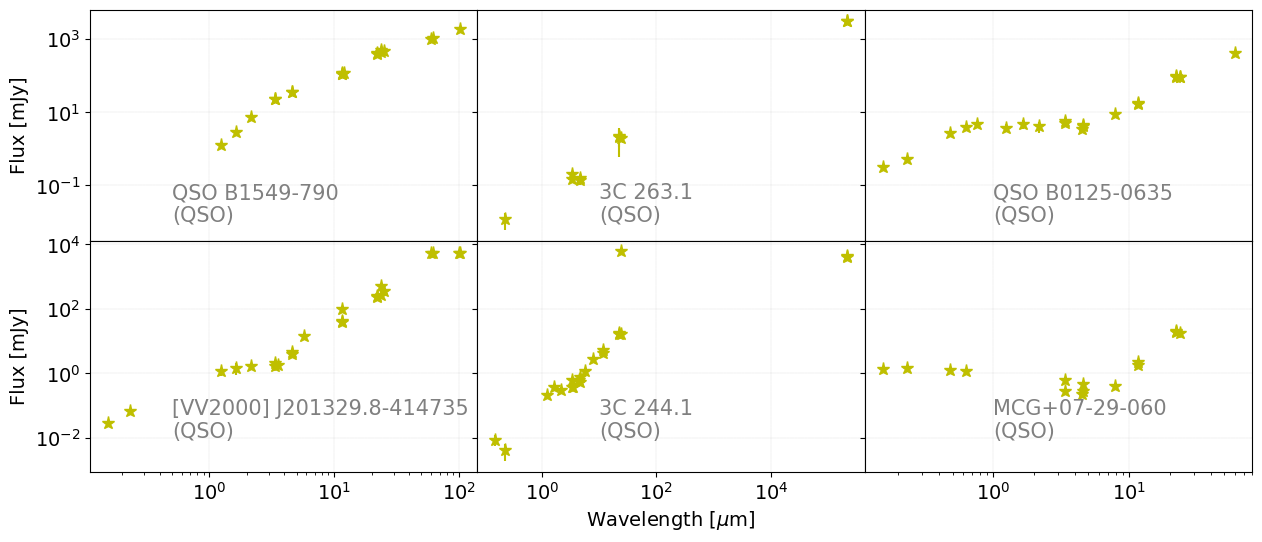

In [80]:
QSOs = ['QSO B1549-790','3C 263.1','QSO B0125-0635',
            '[VV2000] J201329.8-414735','3C 244.1','MCG+07-29-060']

fig, axs = plt.subplots(2,3,figsize=(15,6),sharex='col',sharey='row')

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
line_width = 0.8

i=0
j=0

for sed, gal in enumerate(QSOs):
    seds = Table.read(path_SED+gal+'_Phot.txt', format='ascii')
    axs[i,j].errorbar(seds['Wave'],seds['Flux']*1000,
                      yerr=seds['F_er']*1000,fmt='*y',markersize=9.5)
    axs[i,j].loglog()
    axs[i,j].grid(color='k', linestyle='--', linewidth=0.05)
    axs[i,0].set_ylabel('Flux [mJy]',fontsize=14)
    if i==0:
        y=1e-2
    elif i==1 or i==2:
        y=1e-2
    if j==0:
        x=5e-1
    elif j==1:
        x=10
    elif j==2:
        x=1
    axs[i,j].text(x,y,gal+'\n(QSO)',fontsize=15,color='gray')
    j+=1
    if j>2:
        i+=1
        j=0

axs[1,1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
plt.subplots_adjust(hspace=0.0,wspace=0.0) #Space between subplots
plt.savefig('SED_QSO.jpg')
plt.show()

### Notebook Info:

In [10]:
%load_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.12.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-71-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

matplotlib: 3.7.1
astropy   : 5.1
numpy     : 1.21.5

Watermark: 2.3.1

